# Laboratorio 6
## Universidad del Valle de Guatemala <br> Facultad de Ingeniería
#### Departamento de Ciencias de la Computación <br> Data Science - Sección 10
#### Cristian Laynez

## Problema 1 - Tráfico en la cuidad de Guatemala

In [1]:
# Importar librerias
import pandas as pd
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast

In [2]:
from nltk import bigrams
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
stop_words = set(stopwords.words('spanish'))
stop_words

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

#### 2. Cargar el archivo de datos.

In [7]:
data_frame = pd.read_csv('./data/traficogt.csv', encoding='utf-8')
data_frame

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1701654244858679742,1701654244858679742,https://twitter.com/EmisorasUnidas/status/1701...,2023-09-12 17:49:21+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,"#AHORA Amílcar Montejo, director de Comunicaci...",1,2,...,"{'id': 1701651855212691764, 'id_str': '1701651...",NaN,NaN,NaN,NaN,"<a href=""https://twitter.com"" rel=""nofollow"">T...",https://twitter.com,TweetDeck Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1701651855212691764,1701651855212691764,https://twitter.com/amilcarmontejo/status/1701...,2023-09-12 17:39:52+00:00,"{'id': 372126670, 'id_str': '372126670', 'url'...",es,CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES...,149,78,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
2,2,1701348453916311903,1701348453916311903,https://twitter.com/edgarduarteagui/status/170...,2023-09-11 21:34:15+00:00,"{'id': 100815432, 'id_str': '100815432', 'url'...",es,Camión de arena volteado en el viaducto el pul...,2,1,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
3,3,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",3,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1701216420997017888,1701216420997017888,https://twitter.com/EmisorasUnidas/status/1701...,2023-09-11 12:49:36+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,"#AHORA Amílcar Montejo, director de Comunicaci...",0,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://twitter.com"" rel=""nofollow"">T...",https://twitter.com,TweetDeck Web App,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12626,12626,1237533600368562176,1237533600368562176,https://twitter.com/SoyGtm/status/123753360036...,2020-03-11 00:19:37+00:00,"{'id': 3729523453, 'id_str': '3729523453', 'ur...",es,Alguien sabe que paso en la 7av z9. Llevo 45 m...,0,0,...,NaN,"{'id': '13d479b108707983', 'fullName': 'Guatem...",NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
12627,12627,1237513419122593794,1237513419122593794,https://twitter.com/arturocampos61/status/1237...,2020-03-10 22:59:25+00:00,"{'id': 144944157, 'id_str': '144944157', 'url'...",es,Pregunta sería para @amilcarmontejo los inefic...,0,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
12628,12628,1237443272445960197,1237443272445960197,https://twitter.com/C_J_El_Lobo/status/1237443...,2020-03-10 18:20:41+00:00,"{'id': 1852058552, 'id_str': '1852058552', 'ur...",es,fuerte congestionamiento en diagonal 6 provoca...,0,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
12629,12629,1237356194957754368,1237356194957754368,https://twitter.com/ElCan

In [8]:
# Ver todas las columnas
data_frame_columns = data_frame.columns.tolist()
data_frame_columns

['Unnamed: 0',
 'id',
 'id_str',
 'url',
 'date',
 'user',
 'lang',
 'rawContent',
 'replyCount',
 'retweetCount',
 'likeCount',
 'quoteCount',
 'conversationId',
 'hashtags',
 'cashtags',
 'mentionedUsers',
 'links',
 'viewCount',
 'retweetedTweet',
 'quotedTweet',
 'place',
 'coordinates',
 'inReplyToTweetId',
 'inReplyToUser',
 'source',
 'sourceUrl',
 'sourceLabel',
 'media',
 '_type']

#### 3. Limpie y preprocese los datos (Describir de forma detallada las actividades de preprocesamiento que se llevó a cabo)

In [9]:
list_usernames = []
list_raw_descriptions = []
# username, displayname, rawDescription
for user_value in data_frame["user"]:
    username_pattern = r"'username': '([^']+)'"
    raw_description_pattern = r"'rawDescription': '([^']+)'"

    usernames = re.findall(username_pattern, user_value)
    raw_descriptions = re.findall(raw_description_pattern, user_value)
    
    list_usernames.append(usernames[0])
    list_raw_descriptions.append("-1" if len(raw_descriptions) == 0 else raw_descriptions[0])

In [10]:
data_frame["username"] = list_usernames
data_frame["rawDescription"] = list_raw_descriptions

In [11]:
# Eliminar las siguientes columnas
columns_to_delete = [
    "Unnamed: 0", "url", "id_str", "coordinates", 
    "inReplyToTweetId", "inReplyToUser", "media",
    "_type", "conversationId", "cashtags", "links",
    "retweetedTweet", "id", "user",
    "mentionedUsers", "source", "sourceUrl", "quotedTweet"
]

for column in columns_to_delete:
    if column in data_frame_columns:
        data_frame.drop(column, inplace=True, axis=1)

In [12]:
data_frame

,date,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,hashtags,viewCount,place,sourceLabel,username,rawDescription
0,2023-09-12 17:49:21+00:00,es,"#AHORA Amílcar Montejo, director de Comunicaci...",1,2,8,0,"['AHORA', 'TráficoGT']",6645.0,NaN,TweetDeck Web App,EmisorasUnidas,"Primera en Noticias, Primera en Deportes. Sigu..."
1,2023-09-12 17:39:52+00:00,es,CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES...,149,78,524,49,[],163347.0,NaN,Twitter for iPhone,amilcarmontejo,Vocero vial en Municipalidad Guatemala. Inform...
2,2023-09-11 21:34:15+00:00,es,Camión de arena volteado en el viaducto el pul...,2,1,4,0,"['transitogt', 'traficogt']",1033.0,NaN,Twitter for Android,edgarduarteagui,"Paleolibertarian, traditionalist, communitaria..."
3,2023-09-13 16:26:49+00:00,es,"Paciente de 39 años, dolor lumbar de 1 año tra...",3,17,95,0,[],49375.0,NaN,advertiser-interface,DrDavidCabrera,"Médico especialista en medicina deportiva, reh..."
4,2023-09-11 12:49:36+00:00,es,"#AHORA Amílcar Montejo, director de Comunicaci...",0,0,20,0,"['AHORA', 'TráficoGT']",4823.0,NaN,TweetDeck Web App,EmisorasUnidas,"Primera en Noticias, Primera en Deportes. Sigu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12626,2020-03-11 00:19:37+00:00,es,Alguien sabe que paso en la 7av z9. Llevo 45 m...,0,0,0,0,"['TraficoGT', 'TransitoGT']",NaN,"{'id': '13d479b108707983', 'fullName': 'Guatem...",Twitter for Android,SoyGtm,Con firmes esperanzas de que tendremos un mejo...
12627,2020-03-10 22:59:25+00:00,es,Pregunta sería para @amilcarmontejo los inefic...,0,0,3,0,['TraficoGT'],NaN,NaN,Twitter for Android,arturocampos61,"🇬🇹 Cucurucho, Dominico, Amo a 🇬🇹 GUATEMALA 🇬🇹A..."
12628,2020-03-10 18:20:41+00:00,es,fuerte congestionamiento en diagonal 6 provoca...,0,0,9,0,['TraficoGT'],NaN,NaN,Twitter for Android,C_J_El_Lobo,"Moleston, Vulgar Sarcástico, Casaquero Gracios..."
12629,2020-03-10 12:34:40+00:00,es,Don @amilcarmontejo los motoristas aquí en la ...,3,2,13,0,['traficogt'],NaN,NaN,Twitter for iPhone,ElCancheArriaza,Hago música en Cinema Tiger. Link en bio.


In [13]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

In [14]:
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [15]:
def get_stemmed_text(text):    
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

In [16]:
def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [17]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [18]:
def clean_all_text_of_column(column_name : str):
    # Convertir el texto en minúsculas
    data_frame[column_name] = data_frame[column_name].str.lower()

    # Quitar caracteres especiales “#”,”@” o los apóstrofes
    data_frame[column_name] = data_frame[column_name].str.replace(r'[#@\'"]', '', regex=True)

    # Quitar urls
    data_frame[column_name] = data_frame[column_name].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)

    # Eliminar signos de puntuacion
    data_frame[column_name] = data_frame[column_name].str.replace(r'[^\w\s]', '', regex=True)

    # Revisar si hay emojis en el texto y luego quitarlos
    data_frame[column_name] = data_frame[column_name].apply(remove_emojis)

    # Quitar los artículos, preposiciones y conjunciones (stopwords)
    data_frame[column_name] = data_frame[column_name].apply(remove_stopwords)

    # Normalizar las palabras para tratar de convertir todas las palabras encontradas en solo una palabra
    data_frame[column_name] = data_frame[column_name].apply(get_stemmed_text)

    # Aplicar la función de lematización al atributo 'text' para identificar la parte
    # del discurso de una palabra determinada y luego aplicando reglas más complejas 
    # para transformar la palabra en su verdadera raíz
    data_frame[column_name] = data_frame[column_name].apply(apply_lemmatization)

    # # Quitar los numeros para evitar que interfieran en el análisis
    # data_frame[column_name] = data_frame[column_name].apply(remove_numbers)

In [19]:
clean_all_text_of_column("rawContent")
clean_all_text_of_column("rawDescription")

In [20]:
# Convertir las cadenas de hashtags en listas
data_frame['hashtags'] = data_frame['hashtags'].apply(ast.literal_eval)
data_frame['hashtags']

0             [AHORA, TráficoGT]
1                             []
2        [transitogt, traficogt]
3                             []
4             [AHORA, TráficoGT]
                  ...           
12626    [TraficoGT, TransitoGT]
12627                [TraficoGT]
12628                [TraficoGT]
12629                [traficogt]
12630                [TraficoGT]
Name: hashtags, Length: 12631, dtype: object

In [21]:
# Convertir los NaN de viewCount en "-1"
data_frame['viewCount'].fillna(-1.0, inplace=True)

In [22]:
# Convertir los NaN de place en "{}"
data_frame['place'].fillna("{}", inplace=True)

In [23]:
# Vamos a obtener el año de cada uno de los tweets y se crear una columna específica para ese año
data_frame['date'] = pd.to_datetime(data_frame['date'])

data_frame['year'] = data_frame['date'].dt.year

In [24]:
data_frame

,date,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,hashtags,viewCount,place,sourceLabel,username,rawDescription,year
0,2023-09-12 17:49:21+00:00,es,ahora amílcar montejo director comunicación em...,1,2,8,0,"[AHORA, TráficoGT]",6645.0,{},TweetDeck Web App,EmisorasUnidas,primera noticia primera deport sigu toda infor...,2023
1,2023-09-12 17:39:52+00:00,es,conductora negó movilizar vehículo multada cal...,149,78,524,49,[],163347.0,{},Twitter for iPhone,amilcarmontejo,vocero vial municipalidad guatemala informació...,2023
2,2023-09-11 21:34:15+00:00,es,camión arena volteado viaducto pulté hacia hac...,2,1,4,0,"[transitogt, traficogt]",1033.0,{},Twitter for Android,edgarduarteagui,paleolibertarian traditionalist communitarian ...,2023
3,2023-09-13 16:26:49+00:00,es,pacient 39 año dolor lumbar 1 año tra caída hi...,3,17,95,0,[],49375.0,{},advertiser-interface,DrDavidCabrera,médico especialista medicina deportiva rehabil...,2023
4,2023-09-11 12:49:36+00:00,es,ahora amílcar montejo director comunicación em...,0,0,20,0,"[AHORA, TráficoGT]",4823.0,{},TweetDeck Web App,EmisorasUnidas,primera noticia primera deport sigu toda infor...,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12626,2020-03-11 00:19:37+00:00,es,alguien sabe paso 7av z9 llevo 45 minuto parad...,0,0,0,0,"[TraficoGT, TransitoGT]",-1.0,"{'id': '13d479b108707983', 'fullName': 'Guatem...",Twitter for Android,SoyGtm,firm esperanza mejor paí niego tener esperanza...,2020
12627,2020-03-10 22:59:25+00:00,es,pregunta amilcarmontejo ineficient agent manej...,0,0,3,0,[TraficoGT],-1.0,{},Twitter for Android,arturocampos61,cucurucho dominico amo guatemala apasionado de...,2020
12628,2020-03-10 18:20:41+00:00,es,fuert congestionamiento diagon 6 provocado cam...,0,0,9,0,[TraficoGT],-1.0,{},Twitter for Android,C_J_El_Lobo,moleston vulgar sarcástico casaquero gracioson...,2020
12629,2020-03-10 12:34:40+00:00,es,don amilcarmontejo motorista aquí calzada paz ...,3,2,13,0,[traficogt],-1.0,{},Twitter for iPhone,ElCancheArriaza,hago música cinema tiger link bio,2020


#### 4. Análisis exploratorio y serie de insights que se puedan seguir investigando

In [25]:
# En los idiomas donde se habla del tráfico de Guatemala
lang_count = data_frame["lang"].value_counts()
lang_count

lang
es     11946
en       600
zxx       24
fr         9
qme        8
it         6
pt         6
ca         5
in         4
lt         4
qht        3
ja         3
ar         2
art        2
ko         2
eu         2
ru         1
et         1
de         1
tr         1
th         1
Name: count, dtype: int64

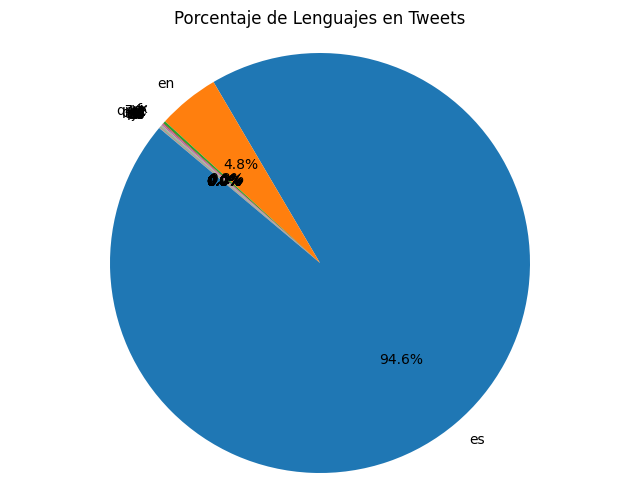

In [26]:
plt.figure(figsize=(8, 6))
plt.pie(lang_count, labels=lang_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Lenguajes en Tweets')
plt.axis('equal')

plt.show()

Como se puede observar el 94.6% de los tweets se crean en el lenguaje español, solo el 4.8% creo tweets en inglés, el resto de los lenguajes estan en menos del 1%.

In [27]:
# Cantidad de dispositivos en donde crean los tweets
data_frame["sourceLabel"].value_counts()

sourceLabel
Twitter for Android               5737
Twitter for iPhone                2743
Twitter Web App                   1772
TweetDeck                         1292
advertiser-interface               358
TweetDeck Web App                  243
Twitter for Advertisers            237
simpleads-ui                        37
Twitter for iPad                    30
Twitter Media Studio                24
Hootsuite Inc.                      14
Sprinklr Publishing                 12
Оwly                                12
Twitter Web Client                  11
Buffer                              10
Periscope                            9
OneSight                             8
Tweet Hunter Pro                     8
SocialFlow                           7
Twitter Ads                          7
erased972529_fzyRVGtcON              7
Instagram                            6
erased5434447                        6
lahoragt1644885914282258435          6
Emplifi                              5
hivemedia-ads

Se puede apreciar que cuando se crean tweets respecto al tráfico se crean en dispositivos móviles.

In [28]:
spanish_tweets_content = data_frame[data_frame["lang"] == "es"]["rawContent"]

tokens_spanish_tweets_content = word_tokenize(' '.join(spanish_tweets_content))

freq_spanish_tweets_content = FreqDist(tokens_spanish_tweets_content)

print("Palabras más comunes en el contenido de los tweets en español del tráfico en Guatemala")
for word, frequency in freq_spanish_tweets_content.most_common(20):
    print(f"=> |{word}| : {frequency}")

Palabras más comunes en el contenido de los tweets en español del tráfico en Guatemala
=> |amilcarmontejo| : 5436
=> |traficogt| : 4289
=> |barevalodeleon| : 3119
=> |zona| : 2542
=> |sandratorresgua| : 2510
=> |tráficogt| : 1798
=> |call| : 1591
=> |vía| : 1578
=> |avenida| : 1462
=> |si| : 965
=> |ahora| : 953
=> |transitogt| : 874
=> |guatemala| : 799
=> |drgiammattei| : 757
=> |partidoun| : 685
=> |vehículo| : 664
=> |1| : 645
=> |munigu| : 644
=> |msemillagt| : 566
=> |hacia| : 559


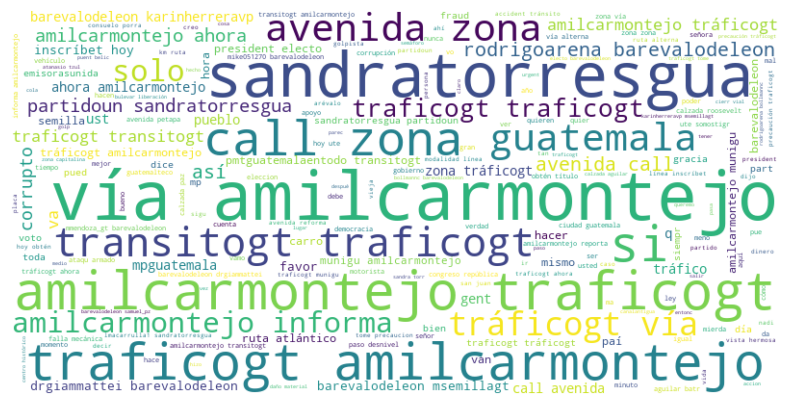

In [29]:
# Combina todos los textos en uno solo (si tus textos están en una lista)
combined_text_rawContent = ' '.join(data_frame["rawContent"])

# Configura la nube de palabras
wordcloud = WordCloud(
    background_color='white',  # Color del fondo
    width=800, height=400,     # Tamaño de la imagen de la nube de palabras
    max_words=200,             # Número máximo de palabras en la nube
).generate(combined_text_rawContent)

# Muestra la nube de palabras en una figura de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.show()

Se puede ver que en la información más relevante se encuentra en el contenido del tweet, varios de las palabras que se mencionan mucho a "amilcarmontejo" y se mencionan mucho a los candidatos para presidente como a Sandra Torres, el presidente actual Alejandro Giammattei y se habla un poco de movimiento semilla. Esto hace mucho sentido ya que por este tipo de palabras encontradas se puede entender que por las manifestaciones hechas o por que ellos fueron los causantes de esto hace que exista mucho tráfico en Guatemala.

In [30]:
spanish_tweets_description = data_frame[data_frame["lang"] == "es"]["rawDescription"]

tokens_spanish_tweets_description = word_tokenize(' '.join(spanish_tweets_description))

freq_spanish_tweets_description = FreqDist(tokens_spanish_tweets_description)

print("Palabras más comunes en la descripción de los tweets en español del tráfico en Guatemala")
for word, frequency in freq_spanish_tweets_description.most_common(20):
    print(f"=> |{word}| : {frequency}")

Palabras más comunes en la descripción de los tweets en español del tráfico en Guatemala
=> |1| : 3199
=> |guatemala| : 1877
=> |noticia| : 1086
=> |vida| : 881
=> |información| : 878
=> |mundo| : 857
=> |primera| : 750
=> |mejor| : 725
=> |toda| : 630
=> |deport| : 477
=> |diario| : 417
=> |líder| : 394
=> |guatemalaneleccion| : 392
=> |nsuscríbas| : 392
=> |únase| : 392
=> |telegram| : 392
=> |sigu| : 388
=> |comprometido| : 383
=> |noticiosa| : 373
=> |canal| : 349


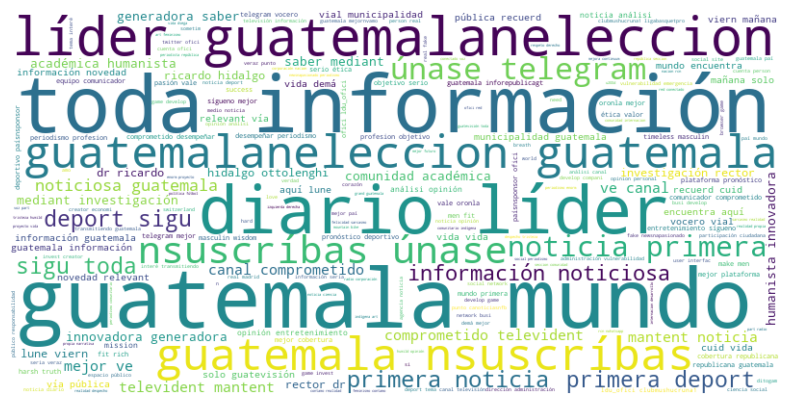

In [31]:
# Combina todos los textos en uno solo (si tus textos están en una lista)
combined_text_rawContent = ' '.join(data_frame["rawDescription"])

# Configura la nube de palabras
wordcloud = WordCloud(
    background_color='white',  # Color del fondo
    width=800, height=400,     # Tamaño de la imagen de la nube de palabras
    max_words=200,             # Número máximo de palabras en la nube
).generate(combined_text_rawContent)

# Muestra la nube de palabras en una figura de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.show()

En la descripciones no se encontró mucha información relevante, solamente se encontró nombres de redes sociales o de noticieros.

In [32]:
# Vamos a ver bigramas
bigrams_spanish_tweets_content = list(bigrams(tokens_spanish_tweets_content))

freq_bigrams_spanish_tweets_content = FreqDist(bigrams_spanish_tweets_content)

print('Bigramas más comunes en tweets de desastres:')
for word, frequency in freq_bigrams_spanish_tweets_content.most_common(20):
    print(f'{word}: {frequency}')

Bigramas más comunes en tweets de desastres:
('vía', 'amilcarmontejo'): 1095
('amilcarmontejo', 'traficogt'): 840
('traficogt', 'amilcarmontejo'): 796
('call', 'zona'): 692
('transitogt', 'traficogt'): 480
('zona', '1'): 467
('avenida', 'zona'): 412
('tráficogt', 'vía'): 400
('traficogt', 'traficogt'): 333
('amilcarmontejo', 'informa'): 332
('rodrigoarena', 'barevalodeleon'): 325
('amilcarmontejo', 'ahora'): 324
('partidoun', 'sandratorresgua'): 303
('zona', '10'): 289
('amilcarmontejo', 'tráficogt'): 265
('zona', '11'): 254
('traficogt', 'transitogt'): 254
('barevalodeleon', 'karinherreravp'): 253
('ahora', 'amilcarmontejo'): 225
('drgiammattei', 'barevalodeleon'): 208


In [33]:
# Vamos a ver trigramas de 3 palabras
trigrams_spanish_tweets_content = list(ngrams(tokens_spanish_tweets_content, 3))

freq_trigrams_spanish_tweets_content = FreqDist(trigrams_spanish_tweets_content)

print('Trigramas de 3 palabras más comunes en tweets en español de tráfico:')
for word, frequency in freq_trigrams_spanish_tweets_content.most_common(20):
    print(f'{word}: {frequency}')

Trigramas de 3 palabras más comunes en tweets en español de tráfico:
('tráficogt', 'vía', 'amilcarmontejo'): 388
('vía', 'amilcarmontejo', 'ahora'): 238
('call', 'zona', '1'): 231
('ahora', 'amilcarmontejo', 'informa'): 163
('pmtguatemalaentodo', 'transitogt', 'traficogt'): 157
('vía', 'amilcarmontejo', 'tráficogt'): 126
('transitogt', 'traficogt', 'amilcarmontejo'): 106
('inscríbet', 'hoy', 'ute'): 99
('vía', 'amilcarmontejo', 'traficogt'): 98
('call', 'zona', '10'): 98
('modalidad', 'línea', 'inscríbet'): 94
('línea', 'inscríbet', 'hoy'): 94
('inscríbet', 'hoy', 'obtén'): 90
('hoy', 'obtén', 'título'): 90
('mmendoza_gt', 'barevalodeleon', 'drgiammattei'): 89
('call', 'zona', '12'): 87
('tráficogt', 'ahora', 'amilcarmontejo'): 81
('traficogt', 'transitogt', 'amilcarmontejo'): 81
('calzada', 'aguilar', 'batr'): 79
('traficogt', 'amilcarmontejo', 'traficogt'): 77


In [34]:
# Vamos a ver trigramas de 4 palabras
trigrams_spanish_tweets_content = list(ngrams(tokens_spanish_tweets_content, 4))

freq_trigrams_spanish_tweets_content = FreqDist(trigrams_spanish_tweets_content)

print('Trigramas de 4 palabras más comunes en tweets en español de tráfico:')
for word, frequency in freq_trigrams_spanish_tweets_content.most_common(20):
    print(f'{word}: {frequency}')

Trigramas de 4 palabras más comunes en tweets en español de tráfico:
('tráficogt', 'vía', 'amilcarmontejo', 'ahora'): 192
('modalidad', 'línea', 'inscríbet', 'hoy'): 94
('línea', 'inscríbet', 'hoy', 'ute'): 94
('inscríbet', 'hoy', 'obtén', 'título'): 90
('tráficogt', 'ahora', 'amilcarmontejo', 'informa'): 68
('drgiammattei', 'barevalodeleon', 'karinherreravp', 'msemillagt'): 61
('barevalodeleon', 'karinherreravp', 'msemillagt', 'jeanellydvg'): 61
('daño', 'material', 'tráficogt', 'vía'): 60
('material', 'tráficogt', 'vía', 'amilcarmontejo'): 60
('inscríbet', 'hoy', 'ute', 'somostigr'): 60
('quorumgt', 'drgiammattei', 'barevalodeleon', 'karinherreravp'): 59
('vicentecarrera_', 'sarmientowski', 'barevalodeleon', 'msemillagt'): 57
('pmtguatemalaentodo', 'transitogt', 'traficogt', 'tráficogt'): 53
('solo', 'daño', 'material', 'tráficogt'): 52
('vía', 'alterna', 'evitar', 'tráfico'): 48
('guatemalagob', 'shirleyriveragt', 'barevalodeleon', 'rocasgt'): 48
('shirleyriveragt', 'barevalodeleon'

Los trigramas dieron más contexto de lo que se suele hablar en el tráfico y del porque.

In [35]:
# Aplanar la lista de hashtags
flattened_hashtags = data_frame['hashtags'].explode()

# Calcular el conteo de los hashtags
hashtag_counts = flattened_hashtags.value_counts()

# Seleccionar los 10 hashtags más repetidos (puedes ajustar el número según tus necesidades)
top_10_hashtags = hashtag_counts.head(20)

top_10_hashtags

hashtags
TraficoGT                2926
TráficoGT                1631
TransitoGT                769
traficogt                 709
AHORA                     610
UTE                       208
SomosTigres               208
PMTGuatemalaEnTodo        196
Guatemala                 171
FrenemosLosAccidentes     147
MuniGuate                 143
TraficoGt                  92
traficoGT                  83
transitogt                 76
Ahora                      75
tráficoGT                  74
Traficogt                  70
MejorasTuMejoraTodo        68
TráficoGt                  61
JuntosLogramosMás          60
Name: count, dtype: int64

In [36]:
data_frame["year"].value_counts()

year
2023    7265
2020    1683
2019    1375
2021    1193
2022    1109
2018       4
2012       2
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

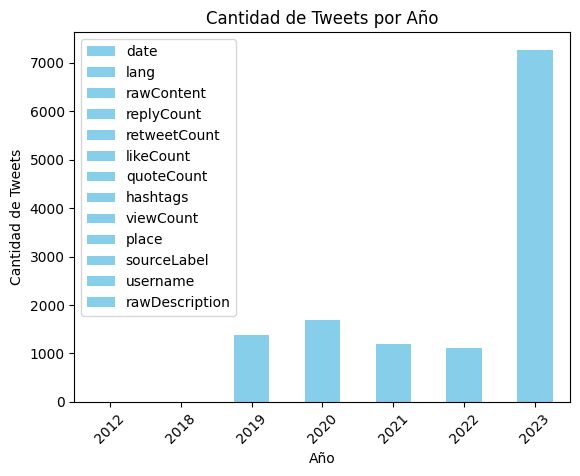

In [37]:
# Datos a lo largo del tiempo
tweets_by_year = data_frame.groupby('year').count()

plt.figure(figsize=(10, 6))
tweets_by_year.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Tweets por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Tweets')
plt.xticks(rotation=45)
plt.show()

Como se puede observar el impacto del tráfico a impactado significativamente este año (2023) y más aumenta con todos los problemas que han ocurrido y con el asunto de las elecciones presidenciales aumenta más el número.

#### 5. Preguntas

##### ¿Cómo ha venido a complicar el tráfico en toda la cuidad la época de lluvia?

In [38]:
df_rain = data_frame[data_frame['rawContent'].str.contains('lluvia', case=False, na=False)]
df_rain

,date,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,hashtags,viewCount,place,sourceLabel,username,rawDescription,year
51,2023-08-16 20:16:19+00:00,es,ahora amilcarmontejo recuerda recomendacion tr...,0,1,23,0,"[AHORA, TráficoGT]",7151.0,{},TweetDeck Web App,PublinewsGT,1,2023
99,2023-07-31 23:39:59+00:00,es,tráficogt autoridad tránsito informan tra lluv...,0,3,6,1,"[TráficoGT, NuestroDiario, NDPlay]",3643.0,{},Twitter Web App,NuestroDiario,diario mayor circulación guatemala noticia 199...,2023
342,2023-09-03 04:26:43+00:00,es,yoda_bagana sandratorresgua barevalodeleon res...,0,0,1,0,[],39.0,{},Twitter for iPhone,guiselabarrios,1,2023
1002,2023-08-26 19:02:33+00:00,es,fiscalnvicto cidh pactodecorrupto sandratorres...,0,0,0,0,[PactoDeCorruptos],138.0,{},Twitter for Android,aacf73,felicidad sarcasmo realidad despecho tristeza ...,2023
2277,2022-10-14 12:58:10+00:00,es,ahora amilcarmontejo informa registra lluvia v...,0,0,6,0,"[AHORA, ClimaGT, TráficoGT]",-1.0,{},TweetDeck,PublinewsGT,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12458,2020-05-18 19:49:48+00:00,es,bajo puent lluvia gracia carro averiado afecta...,0,0,0,0,[traficogt],-1.0,{},Twitter for Android,jayitowoll,loco engasado pasa,2020
12514,2020-04-21 21:47:14+00:00,es,traficogt tome precaucion amilcarmontejo repor...,0,0,2,0,[TraficoGT],-1.0,{},Twitter Web App,noti_panorama,equipo comunicador comprometido desempeñar per...,2020
12550,2020-04-04 18:30:13+00:00,es,precaución traficogt presencia lluvia zona 10 ...,0,8,34,0,[TraficoGT],-1.0,{},Twitter for Android,muniauxiliarz10,1,2020
12568,2020-04-01 22:31:57+00:00,es,fuert lluvia área nort ciudad precaución amilc...,0,2,5,0,"[TransitoGT, TraficoGT]",-1.0,{},Twitter for iPhone,RegenciaNorte,muni cerca,2020


In [39]:
rain_content = df_rain[df_rain["lang"] == "es"]["rawContent"]

tokens_rain_content = word_tokenize(' '.join(rain_content))

freq_rain_content = FreqDist(tokens_rain_content)

print("Palabras más comunes cuando hay lluvia en el tráfico")
for word, frequency in freq_rain_content.most_common(25):
    print(f"=> |{word}| : {frequency}")

Palabras más comunes cuando hay lluvia en el tráfico
=> |lluvia| : 160
=> |amilcarmontejo| : 139
=> |traficogt| : 131
=> |transitogt| : 72
=> |zona| : 51
=> |precaución| : 45
=> |vía| : 45
=> |climagt| : 44
=> |tráficogt| : 42
=> |munigu| : 36
=> |noch| : 36
=> |plansantiago| : 34
=> |tard| : 33
=> |juntoslogramosma| : 32
=> |insivumehgt| : 30
=> |ciudad| : 29
=> |fuert| : 28
=> |eléctrica| : 25
=> |actividad| : 24
=> |vehículo| : 22
=> |pmtguatemalaentodo| : 22
=> |dispersa| : 22
=> |ciudadguatemala| : 22
=> |mañana| : 20
=> |área| : 19


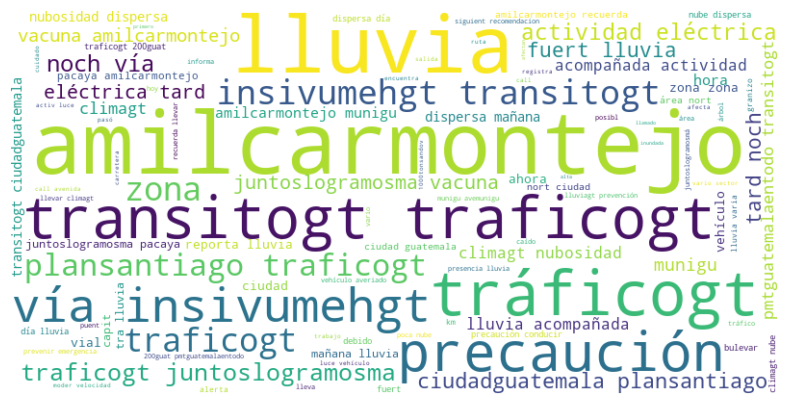

In [40]:
# Combina todos los textos en uno solo (si tus textos están en una lista)
combined_rain = ' '.join(df_rain["rawContent"])

# Configura la nube de palabras
wordcloud = WordCloud(
    background_color='white',  # Color del fondo
    width=800, height=400,     # Tamaño de la imagen de la nube de palabras
    max_words=100,             # Número máximo de palabras en la nube
).generate(combined_rain)

# Muestra la nube de palabras en una figura de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.show()

In [41]:
bigrams_rain = list(bigrams(tokens_rain_content))

freq_rain = FreqDist(bigrams_rain)

print('Bigramas más comunes en tweets cuando llueve en el trafico:')
for word, frequency in freq_rain.most_common(20):
    print(f'{word}: {frequency}')

Bigramas más comunes en tweets cuando llueve en el trafico:
('transitogt', 'traficogt'): 38
('vía', 'insivumehgt'): 30
('insivumehgt', 'transitogt'): 30
('plansantiago', 'traficogt'): 28
('traficogt', 'juntoslogramosma'): 28
('noch', 'vía'): 26
('actividad', 'eléctrica'): 24
('ciudadguatemala', 'plansantiago'): 22
('tard', 'noch'): 20
('fuert', 'lluvia'): 20
('eléctrica', 'tard'): 18
('juntoslogramosma', 'vacuna'): 18
('vacuna', 'amilcarmontejo'): 18
('pmtguatemalaentodo', 'transitogt'): 16
('zona', '10'): 15
('amilcarmontejo', 'traficogt'): 14
('lluvia', 'acompañada'): 14
('acompañada', 'actividad'): 14
('climagt', 'nubosidad'): 14
('amilcarmontejo', 'munigu'): 13


In [42]:
# Vamos a ver trigramas de 3 palabras
trigrams_rain = list(ngrams(tokens_rain_content, 3))

freq_rain = FreqDist(trigrams_rain)

print('Trigramas de 3 palabras más comunes en tweets donde esta lloviendo en el trafico:')
for word, frequency in freq_rain.most_common(20):
    print(f'{word}: {frequency}')

Trigramas de 3 palabras más comunes en tweets donde esta lloviendo en el trafico:
('vía', 'insivumehgt', 'transitogt'): 30
('plansantiago', 'traficogt', 'juntoslogramosma'): 28
('noch', 'vía', 'insivumehgt'): 26
('ciudadguatemala', 'plansantiago', 'traficogt'): 22
('actividad', 'eléctrica', 'tard'): 18
('tard', 'noch', 'vía'): 18
('insivumehgt', 'transitogt', 'traficogt'): 18
('traficogt', 'juntoslogramosma', 'vacuna'): 18
('juntoslogramosma', 'vacuna', 'amilcarmontejo'): 18
('eléctrica', 'tard', 'noch'): 14
('lluvia', 'acompañada', 'actividad'): 14
('acompañada', 'actividad', 'eléctrica'): 14
('climagt', 'nubosidad', 'dispersa'): 12
('nubosidad', 'dispersa', 'mañana'): 12
('insivumehgt', 'transitogt', 'ciudadguatemala'): 12
('transitogt', 'ciudadguatemala', 'plansantiago'): 12
('pmtguatemalaentodo', 'transitogt', 'traficogt'): 10
('dispersa', 'mañana', 'lluvia'): 10
('mañana', 'lluvia', 'acompañada'): 10
('traficogt', 'juntoslogramosma', 'pacaya'): 10


In [43]:
# Vamos a ver trigramas de 4 palabras
trigrams_rain = list(ngrams(tokens_rain_content, 4))

freq_rain = FreqDist(trigrams_rain)

print('Trigramas de 4 palabras más comunes en tweets donde esta lloviendo en el trafico:')
for word, frequency in freq_rain.most_common(20):
    print(f'{word}: {frequency}')

Trigramas de 4 palabras más comunes en tweets donde esta lloviendo en el trafico:
('noch', 'vía', 'insivumehgt', 'transitogt'): 26
('ciudadguatemala', 'plansantiago', 'traficogt', 'juntoslogramosma'): 22
('tard', 'noch', 'vía', 'insivumehgt'): 18
('vía', 'insivumehgt', 'transitogt', 'traficogt'): 18
('plansantiago', 'traficogt', 'juntoslogramosma', 'vacuna'): 18
('traficogt', 'juntoslogramosma', 'vacuna', 'amilcarmontejo'): 18
('actividad', 'eléctrica', 'tard', 'noch'): 14
('eléctrica', 'tard', 'noch', 'vía'): 14
('lluvia', 'acompañada', 'actividad', 'eléctrica'): 14
('acompañada', 'actividad', 'eléctrica', 'tard'): 12
('climagt', 'nubosidad', 'dispersa', 'mañana'): 12
('vía', 'insivumehgt', 'transitogt', 'ciudadguatemala'): 12
('insivumehgt', 'transitogt', 'ciudadguatemala', 'plansantiago'): 12
('transitogt', 'ciudadguatemala', 'plansantiago', 'traficogt'): 12
('nubosidad', 'dispersa', 'mañana', 'lluvia'): 10
('dispersa', 'mañana', 'lluvia', 'acompañada'): 10
('mañana', 'lluvia', 'aco

En base al análisis de las palabras anteriormente realizado, se puede ver que aumenta el tráfico de forma significativa. En la noche es donde suelen pasar más problemas ya que en la mayoría de los tweets mencionan "noche" y ahí es donde afecta mucho más cuando la lluvia se pone fuerte. Se da a entender que suelen existir problemas relacionados con la electricidad. Los policias de transito (PMT) es muy mencionado con respecto al tránsito. En el tráfico también suele afectar mucho cuando el cielo esta nubloso en la mañana.

En resumen se puede decir que por el clima, la intensidad de la lluvia, y el pmt complica más el tráfico y esto conlleva que suela pasar accidentes o que este más fuerte el tráfico.

##### ¿El socavón de zona 5 ha tenido un impacto importante en el tráfico de la zona de la universidad?

In [44]:
data_frame[data_frame['rawContent'].str.contains('uvg', case=False, na=False)]
# No hay nada relevante, solametne se encontro un tweet basado en la misma uvg

,date,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,hashtags,viewCount,place,sourceLabel,username,rawDescription,year
3168,2022-08-09 19:36:38+00:00,es,manifestar bloquear educando ment libr marta y...,0,9,16,1,"[codeca, usac]",-1.0,{},Twitter Web App,Guate_Libre_,empoderando ment libr construir guatemala impe...,2022
11172,2022-08-09 19:36:38+00:00,es,manifestar bloquear educando ment libr marta y...,0,9,16,1,"[codeca, usac]",-1.0,{},Twitter Web App,Guate_Libre_,empoderando ment libr construir guatemala impe...,2022


In [45]:
df_zone_5 = data_frame[data_frame['rawContent'].str.contains('zona 5', case=False, na=False)]
df_zone_5

,date,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,hashtags,viewCount,place,sourceLabel,username,rawDescription,year
28,2023-09-04 11:18:24+00:00,es,cierr bulevar lourd 26 call zona 5 así encuent...,1,0,3,0,[TráficoGt],789.0,{},Twitter for Android,andre_videsgt,periodista comunicadora social amant buen café,2023
30,2023-09-04 02:43:51+00:00,es,munigu informa cierr tempor 2 carril bulevar l...,7,8,20,4,"[MuniGuate, TraficoGT]",15749.0,{},Twitter Web App,muniguate,ciudad vivir,2023
37,2023-08-26 22:48:48+00:00,es,favor dar rt caverna zona 5 calzada paz pasand...,0,5,6,1,"[TransitoGt, TraficoGt]",2822.0,{},Twitter for Android,SarcAcidBoy,1,2023
2329,2022-10-07 16:01:50+00:00,es,banqueta caminar zona 5 colonia chácara ahora ...,4,19,21,1,"[TraficoGT, TransitoGT]",-1.0,{},Twitter for Android,AlfredArteaga2,,2022
2427,2023-09-04 11:18:24+00:00,es,cierr bulevar lourd 26 call zona 5 así encuent...,1,0,3,0,[TráficoGt],789.0,{},Twitter for Android,andre_videsgt,periodista comunicadora social amant buen café,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12429,2020-05-27 13:52:46+00:00,es,tráficogt derrumb km 58 ruta atlántico complic...,0,0,7,0,[TráficoGT],-1.0,{},TweetDeck,Guatevision_tv,mejor ve canal comprometido televident mantent...,2020
12470,2020-05-12 21:55:45+00:00,es,don amilcarmontejo 36 avenida 27 call zona 5 s...,0,0,0,0,[TraficoGT],-1.0,{},Twitter for iPhone,CMELCHOR76,laughter is timeless imagin age and dream are ...,2020
12513,2020-04-22 12:45:55+00:00,es,amilcarmontejo traficogt accident persona atro...,11,5,26,0,[TraficoGT],-1.0,{},Twitter for Android,maykolluna,1,2020
12563,2020-04-03 12:09:30+00:00,es,amilcarmontejo trailer varado desperfecto calz...,0,0,0,0,[TraficoGT],-1.0,{},Twitter for Android,atiu07,1,2020


In [46]:
zone_5_content = df_zone_5[df_zone_5["lang"] == "es"]["rawContent"]

tokens_zone_5 = word_tokenize(' '.join(zone_5_content))

freq_zone_5 = FreqDist(tokens_zone_5)

print("Palabras más comunes cuando hay lluvia en el tráfico")
for word, frequency in freq_zone_5.most_common(25):
    print(f"=> |{word}| : {frequency}")

Palabras más comunes cuando hay lluvia en el tráfico
=> |zona| : 162
=> |5| : 127
=> |amilcarmontejo| : 110
=> |traficogt| : 72
=> |call| : 68
=> |tráficogt| : 49
=> |avenida| : 45
=> |vía| : 38
=> |hacia| : 32
=> |paz| : 31
=> |calzada| : 30
=> |27| : 24
=> |camino| : 20
=> |transitogt| : 20
=> |4| : 18
=> |vehículo| : 18
=> |26| : 17
=> |puent| : 17
=> |informa| : 17
=> |paso| : 16
=> |bulevar| : 15
=> |ahora| : 14
=> |semáforo| : 14
=> |lourd| : 13
=> |frent| : 13


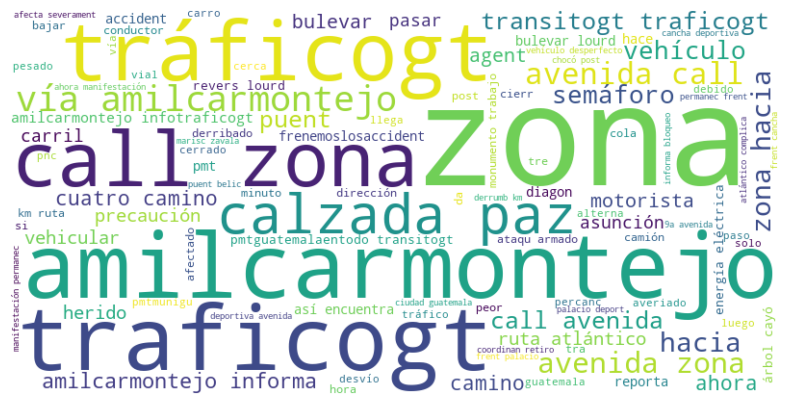

In [47]:
# Combina todos los textos en uno solo (si tus textos están en una lista)
combined_zone_5 = ' '.join(df_zone_5["rawContent"])

# Configura la nube de palabras
wordcloud = WordCloud(
    background_color='white',  # Color del fondo
    width=800, height=400,     # Tamaño de la imagen de la nube de palabras
    max_words=100,             # Número máximo de palabras en la nube
).generate(combined_zone_5)

# Muestra la nube de palabras en una figura de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.show()

In [48]:
bigrams_zone_5 = list(bigrams(tokens_zone_5))

freq_zone_5 = FreqDist(bigrams_zone_5)

print('Bigramas más comunes en tweets cuando llueve en el trafico:')
for word, frequency in freq_zone_5.most_common(20):
    print(f'{word}: {frequency}')

Bigramas más comunes en tweets cuando llueve en el trafico:
('zona', '5'): 123
('call', 'zona'): 44
('calzada', 'paz'): 30
('vía', 'amilcarmontejo'): 30
('27', 'call'): 23
('avenida', 'zona'): 19
('26', 'call'): 16
('traficogt', 'amilcarmontejo'): 15
('transitogt', 'traficogt'): 13
('5', 'hacia'): 13
('tráficogt', 'amilcarmontejo'): 12
('amilcarmontejo', 'informa'): 11
('4', 'camino'): 10
('cuatro', 'camino'): 10
('tráficogt', 'vía'): 9
('amilcarmontejo', 'tráficogt'): 9
('amilcarmontejo', 'amilcarmontejo'): 8
('paz', 'zona'): 8
('hacia', 'zona'): 8
('zona', '4'): 8


Desde este punto se puede observar que si ha tenido un impacto en el trafico de la zona de la universidad, ya que se mencionan varios tweets mencionando la calzada de la paz.

In [49]:
# Vamos a ver trigramas de 3 palabras
trigrams_zone_5 = list(ngrams(tokens_zone_5, 3))

freq_rain = FreqDist(trigrams_zone_5)

print('Trigramas de 3 palabras más comunes en tweets donde el tráfico afecta la llegada a la Universidad:')
for word, frequency in freq_rain.most_common(20):
    print(f'{word}: {frequency}')

Trigramas de 3 palabras más comunes en tweets donde el tráfico afecta la llegada a la Universidad:
('call', 'zona', '5'): 38
('avenida', 'zona', '5'): 14
('zona', '5', 'hacia'): 13
('27', 'call', 'zona'): 12
('26', 'call', 'zona'): 10
('tráficogt', 'vía', 'amilcarmontejo'): 9
('calzada', 'paz', 'zona'): 8
('paz', 'zona', '5'): 8
('zona', '5', 'amilcarmontejo'): 8
('zona', '5', 'traficogt'): 7
('zona', '5', 'tráficogt'): 7
('avenida', '26', 'call'): 6
('pmtguatemalaentodo', 'transitogt', 'traficogt'): 6
('tráficogt', 'amilcarmontejo', 'infotraficogt'): 5
('zona', '5', 'calzada'): 5
('5', 'calzada', 'paz'): 5
('asunción', 'zona', '5'): 5
('hacia', 'calzada', 'paz'): 5
('zona', '4', 'zona'): 5
('4', 'zona', '5'): 5


In [50]:
# Vamos a ver trigramas de 4 palabras
trigrams_zone_5 = list(ngrams(tokens_zone_5, 4))

freq_rain = FreqDist(trigrams_zone_5)

print('Trigramas de 4 palabras más comunes en tweets donde el tráfico afecta la llegada a la Universidad:')
for word, frequency in freq_rain.most_common(20):
    print(f'{word}: {frequency}')

Trigramas de 4 palabras más comunes en tweets donde el tráfico afecta la llegada a la Universidad:
('27', 'call', 'zona', '5'): 11
('26', 'call', 'zona', '5'): 10
('calzada', 'paz', 'zona', '5'): 8
('avenida', '26', 'call', 'zona'): 6
('zona', '5', 'calzada', 'paz'): 5
('zona', '4', 'zona', '5'): 5
('avenida', '27', 'call', 'zona'): 4
('zona', '5', 'hacia', 'zona'): 4
('ahora', 'manifestación', 'permanec', 'frent'): 4
('manifestación', 'permanec', 'frent', 'palacio'): 4
('permanec', 'frent', 'palacio', 'deport'): 4
('frent', 'palacio', 'deport', '26'): 4
('palacio', 'deport', '26', 'call'): 4
('deport', '26', 'call', '9a'): 4
('26', 'call', '9a', 'avenida'): 4
('call', '9a', 'avenida', 'zona'): 4
('9a', 'avenida', 'zona', '1'): 4
('avenida', 'zona', '1', 'frent'): 4
('zona', '1', 'frent', 'cancha'): 4
('1', 'frent', 'cancha', 'deportiva'): 4


En unos casos super raros se mencionan manifestaciones.

#### 6. Conclusiones

- Depende del clima el tráfico puede tener un major impacto.
- La pmt también tiene mucho que ver con el impacto del tráfico y se ven afectados por la lluvia.
- En la noche es donde hay más impacto en el tráfico si es que hay más factores que este lo afecten.

## Para el lab 8 de Visualizaciones

PD: Para esta sección se ejecutarán los mismos resultados obtenidos en el lab 6 pero esta vez más limpio y aplicando una paleta de colores más formal para el informe.

In [51]:
import random

In [52]:
# Paleta de colores
COLORS = [
    f"#7DBBEF",
    f"#5C6770",
    f"#6294BD",
    f"#3A5870",
    f"#C7DFF2",
]

In [53]:
data_frame["year"].value_counts().head(5)

year
2023    7265
2020    1683
2019    1375
2021    1193
2022    1109
Name: count, dtype: int64

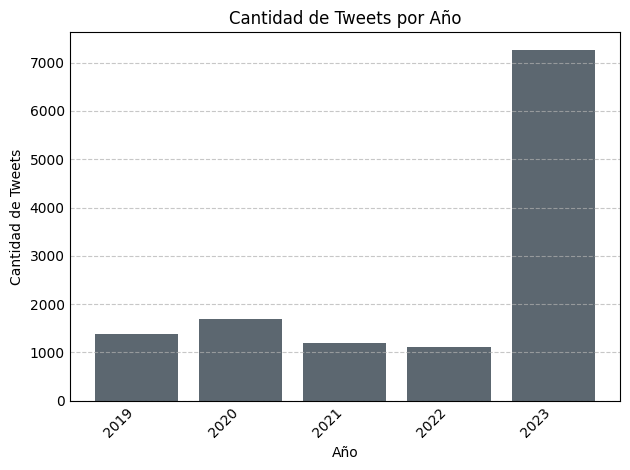

In [54]:
tweets_by_year = data_frame["year"].value_counts().head(5)

plt.bar(tweets_by_year.index, tweets_by_year, color=COLORS[1])
plt.xlabel('Año')
plt.ylabel('Cantidad de Tweets')
plt.title('Cantidad de Tweets por Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='both', which='both', length=0)
plt.tight_layout()
plt.show()

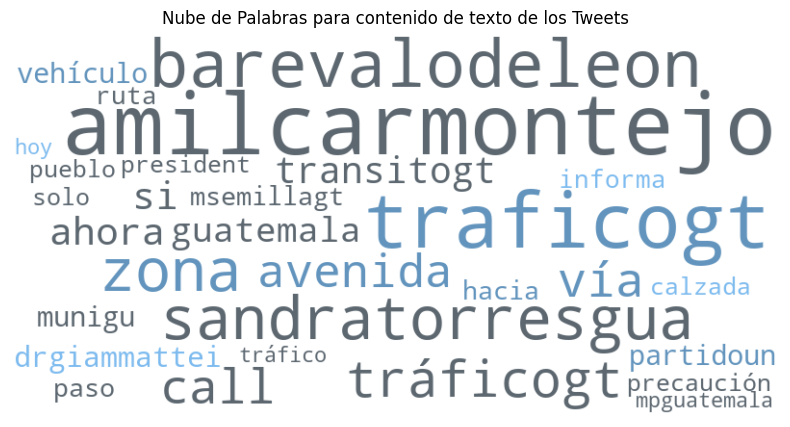

In [67]:
# Combina todos los textos en uno solo (si tus textos están en una lista)
combined_text_rawContent = ' '.join(data_frame["rawContent"])

# Configura la nube de palabras
wordcloud = WordCloud(
    background_color='white',  # Color del fondo
    width=800, height=400,     # Tamaño de la imagen de la nube de palabras
    max_words=30,             # Número máximo de palabras en la nube
    collocations=False,        # Desactiva la combinación de palabras
    colormap='viridis',        # Puedes usar cualquier paleta de colores aquí
    color_func=lambda *args, **kwargs: COLORS[3],  # Color de las palabras
    prefer_horizontal=1.0,      # Ajuste de la orientación horizontal de las palabras
    random_state=42            # Semilla para reproducibilidad
).generate(combined_text_rawContent)

for idx, (word, font_size, position, orientation, color) in enumerate(wordcloud.layout_):
    wordcloud.layout_[idx] = (word, font_size, position, orientation, COLORS[random.randint(0, 2)])

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para contenido de texto de los Tweets')
plt.show()

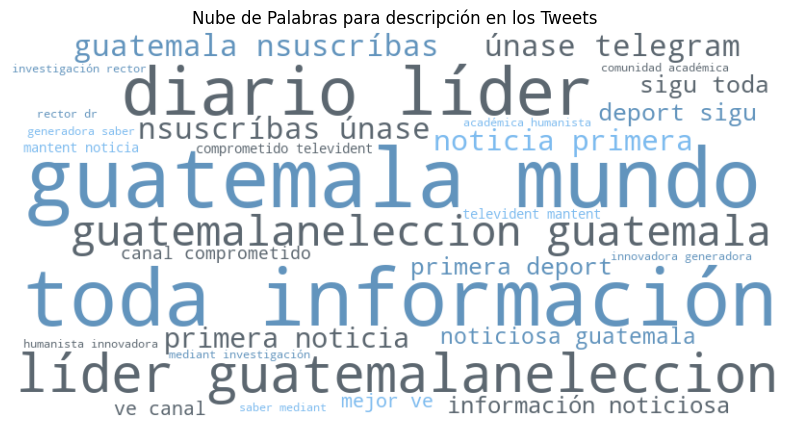

In [70]:
# Combina todos los textos en uno solo (si tus textos están en una lista)
combined_text_rawContent = ' '.join(data_frame["rawDescription"])

# Configura la nube de palabras
wordcloud = WordCloud(
    background_color='white',  # Color del fondo
    width=800, height=400,     # Tamaño de la imagen de la nube de palabras
    max_words=30,             # Número máximo de palabras en la nube
).generate(combined_text_rawContent)

for idx, (word, font_size, position, orientation, color) in enumerate(wordcloud.layout_):
    wordcloud.layout_[idx] = (word, font_size, position, orientation, COLORS[random.randint(0, 2)])
        
# Muestra la nube de palabras en una figura de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.title('Nube de Palabras para descripción en los Tweets')
plt.show()

In [57]:
bigrams_rain = list(bigrams(tokens_rain_content))

freq_rain = FreqDist(bigrams_rain)

print('Bigramas más comunes en tweets cuando llueve en el trafico:')
for word, frequency in freq_rain.most_common(15):
    print(f'{word}: {frequency}')

Bigramas más comunes en tweets cuando llueve en el trafico:
('transitogt', 'traficogt'): 38
('vía', 'insivumehgt'): 30
('insivumehgt', 'transitogt'): 30
('plansantiago', 'traficogt'): 28
('traficogt', 'juntoslogramosma'): 28
('noch', 'vía'): 26
('actividad', 'eléctrica'): 24
('ciudadguatemala', 'plansantiago'): 22
('tard', 'noch'): 20
('fuert', 'lluvia'): 20
('eléctrica', 'tard'): 18
('juntoslogramosma', 'vacuna'): 18
('vacuna', 'amilcarmontejo'): 18
('pmtguatemalaentodo', 'transitogt'): 16
('zona', '10'): 15


In [58]:
COLORS[3]

'#3A5870'

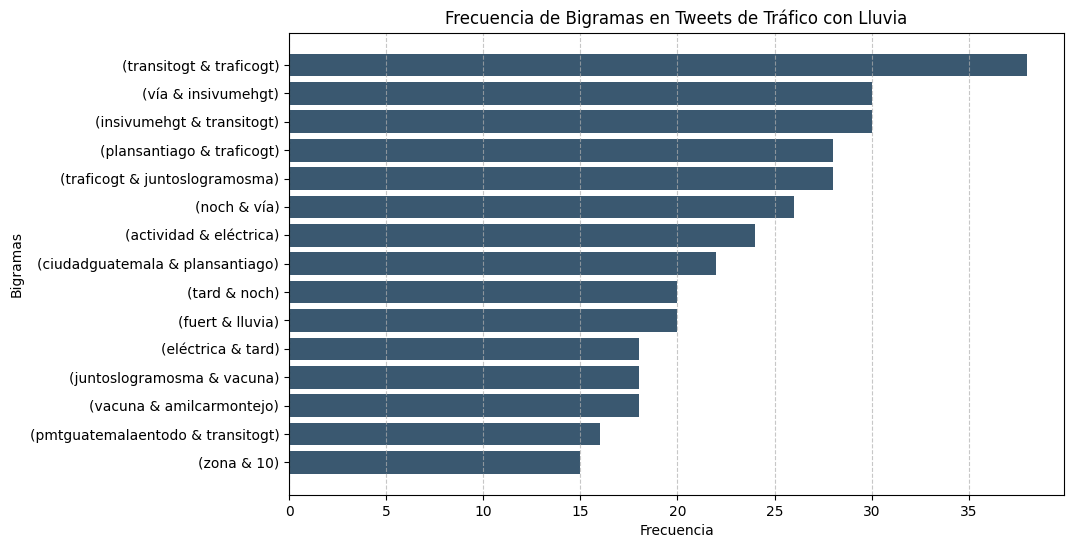

In [62]:
# Obtener bigrams y frecuencias ordenadas de mayor a menor
ordered_bigrams = [f"({word[0]} & {word[1]})" for word, frequency in freq_rain.most_common(15)]
ordered_frequencies = [frequency for word, frequency in freq_rain.most_common(15)]

# Invertir el orden
ordered_bigrams.reverse()
ordered_frequencies.reverse()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(ordered_bigrams, ordered_frequencies, color=COLORS[3])
plt.xlabel('Frecuencia')
plt.ylabel('Bigramas')
plt.title('Frecuencia de Bigramas en Tweets de Tráfico con Lluvia')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

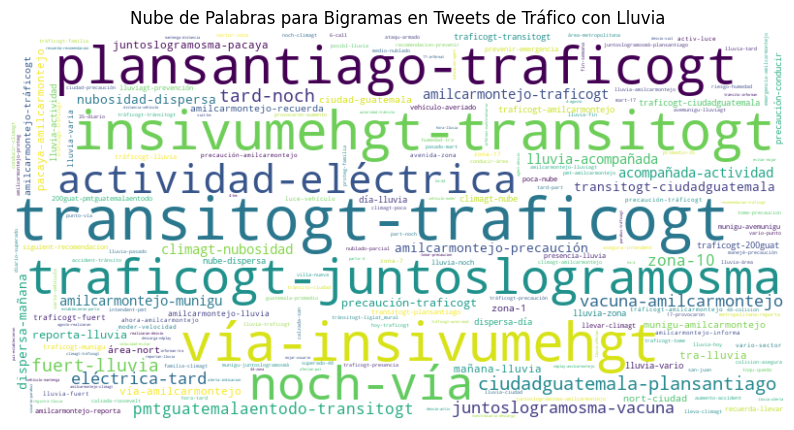

In [60]:
# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({f"{word[0]}-{word[1]}": frequency for word, frequency in freq_rain.items()})

# Mostrar la nube de palabras en una figura de matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Bigramas en Tweets de Tráfico con Lluvia')
plt.show()